In [14]:
import json
import pandas as pd

In [15]:
# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out4/configs.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    values = row_data[0] + list ( row_data[1].values() ) + list( row_data[2].values() )
    rows.append(values)

# # Step 3: Create a DataFrame
configs = pd.DataFrame(rows, columns=['i', 'j', 'k']+list ( row_data[1].keys() ) + list( row_data[2].keys() ))


In [16]:
configs.head()

,i,j,k,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__units,lr,model_based_pick
0,0,0,0,5,2,1,64,2,3,128,0.000359,False
1,0,0,1,4,3,4,32,8,4,32,0.001177,False
2,0,0,2,3,2,3,64,3,2,256,0.000154,False
3,1,0,0,2,3,4,32,4,2,256,0.000149,False
4,1,0,1,1,3,3,64,6,1,128,0.000115,False


In [17]:
configs.shape

(54, 12)

---

In [18]:
import pandas as pd
import json

# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out4/results.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    
    if row_data[3] != None:
        values = row_data[0] + [round(row_data[1],2)] + \
                                list(row_data[2].values()) + \
                                 [row_data[3]['loss']] + \
                                row_data[3]['info']['test accuracy'] + \
                                row_data[3]['info']['validation accuracy'] +\
                                 row_data[3]['info']['train accuracy'] 
    # except TypeError or SyntaxError:
    #     pass
        rows.append(values)

# # Step 3: Create a DataFrame
# try:
loss_list = ['loss','gravity_loss', 'c_o_ratio_loss', 'metallicity_loss', 'temperature_loss', 'gravity_mae', 'c_o_ratio_mae', 'metallicity_mae', 'temperature_mae']


results = pd.DataFrame(rows, columns=['i', 'j', 'k', 'iteration']+
                                       list(row_data[2].keys())+['loss']+
                                       ['test_'+elem for elem in loss_list]+
                                       ['val_'+elem for elem in loss_list]+
                                       ['train_'+elem for elem in loss_list])

In [19]:
results.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,val_temperature_mae,train_loss,train_gravity_loss,train_c_o_ratio_loss,train_metallicity_loss,train_temperature_loss,train_gravity_mae,train_c_o_ratio_mae,train_metallicity_mae,train_temperature_mae
0,14,0,1,10.0,1.690218e+09,1.690218e+09,1.690251e+09,0.610457,0.607528,0.343936,...,0.106250,0.605637,0.338160,0.064898,0.192884,0.009694,0.703760,0.287066,0.514668,0.105570
1,12,0,2,10.0,1.690218e+09,1.690218e+09,1.690255e+09,0.137225,0.140437,0.043301,...,0.100940,0.139570,0.042085,0.027670,0.061063,0.008752,0.214740,0.188898,0.280143,0.102691
2,6,0,2,10.0,1.690218e+09,1.690218e+09,1.690259e+09,0.077075,0.075511,0.015865,...,0.051984,0.074256,0.015550,0.011731,0.044766,0.002210,0.142129,0.127390,0.232962,0.050041
3,4,0,1,10.0,1.690218e+09,1.690218e+09,1.690260e+09,0.109660,0.108979,0.027867,...,0.084636,0.102709,0.025254,0.019852,0.051899,0.005704,0.163938,0.154785,0.253572,0.083825
4,8,0,0,10.0,1.690218e+09,1.690218e+09,1.690262e+09,0.125638,0.128611,0.047249,...,0.126817,0.125234,0.045415,0.016199,0.052183,0.011437,0.256491,0.140162,0.253180,0.128538


In [20]:
results.shape

(15, 35)

In [21]:
# results.iloc[0]

In [22]:

# Concatenate DataFrames based on the first column (ID)
merged_df = pd.merge(results, configs, on=['i','j','k'])

# Print the concatenated DataFrame
merged_df.sort_values(by='loss', inplace=True)


In [23]:
merged_df.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,train_temperature_mae,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__units,lr,model_based_pick
11,2,0,0,10.0,1.690218e+09,1.690218e+09,1.690294e+09,0.059268,0.061047,0.009833,...,0.037362,4,2,2,16,8,2,256,0.001158,False
9,0,0,2,10.0,1.690218e+09,1.690218e+09,1.690286e+09,0.060052,0.060657,0.008367,...,0.046598,3,2,3,64,3,2,256,0.000154,False
7,8,0,1,10.0,1.690218e+09,1.690218e+09,1.690279e+09,0.072830,0.072387,0.011331,...,0.051833,5,4,2,32,4,3,128,0.000011,False
2,6,0,2,10.0,1.690218e+09,1.690218e+09,1.690259e+09,0.077075,0.075511,0.015865,...,0.050041,3,1,2,16,5,3,32,0.000256,False
5,6,0,0,10.0,1.690218e+09,1.690218e+09,1.690270e+09,0.079336,0.078509,0.012855,...,0.066998,1,1,2,64,4,2,128,0.000038,False


In [24]:
merged_df.sort_values(by='submitted').head(4)

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,train_temperature_mae,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__units,lr,model_based_pick
10,0,0,0,10.0,1.690218e+09,1.690218e+09,1.690292e+09,0.093529,0.093643,0.020366,...,0.059721,5,2,1,64,2,3,128,0.000359,False
9,0,0,2,10.0,1.690218e+09,1.690218e+09,1.690286e+09,0.060052,0.060657,0.008367,...,0.046598,3,2,3,64,3,2,256,0.000154,False
11,2,0,0,10.0,1.690218e+09,1.690218e+09,1.690294e+09,0.059268,0.061047,0.009833,...,0.037362,4,2,2,16,8,2,256,0.001158,False
3,4,0,1,10.0,1.690218e+09,1.690218e+09,1.690260e+09,0.109660,0.108979,0.027867,...,0.083825,6,1,4,16,1,3,256,0.000855,False


In [66]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LogTicker, LogTickFormatter

def plot_CumulativeBudget_loss(loss_df_list, print_results=True, plot_results=True):
    output_notebook()

    p = figure(title='Cumulative Budget vs. Validation Huber Loss', 
               x_axis_label='Cumulative Budget',
               y_axis_label='Validation Huber Loss', 
               y_axis_type="log",
               width=800, height=400,
              x_range=(1,201), y_range=(0.04, 1))

    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)

        if print_results:
            print(budget_list, list_loss_smaller)

        if plot_results:
            p.scatter(budget_list, list_loss_smaller, marker='square', size=8, alpha=0.9, legend_label='Data Points')
            p.line(budget_list, list_loss_smaller, line_dash='dashed', line_alpha=0.5, legend_label='Interpolated Line')

    # p.x_range.start = 1
    # p.x_range.end = 301
    # p.y_range.start = 0.04
    # p.y_range.end = 1
    # # p.legend.title = 'Data Points and Interpolated Line'

    # Set logarithmic scale for both x and y axes
    # p.xaxis[0].ticker = LogTicker()
    # p.xaxis[0].formatter = LogTickFormatter()
    # p.yaxis[0].ticker = LogTicker()
    # p.yaxis[0].formatter = LogTickFormatter()

    # Set custom y-axis ticks
    yticks = [0.04, 0.05, 0.1, 0.5, 1.]
    p.yaxis.ticker = yticks
    p.yaxis.major_label_overrides = {tick: str(tick) for tick in yticks}

    show(p)


In [67]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

Loading BokehJS ...

In [44]:
def plot_CumulativeBudget_loss(loss_df_list,
                              print_results = True,
                              plot_results = True,
                              ):
    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                print(smallest_value)
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)



        if print_results:
            print( budget_list, list_loss_smaller)



        if plot_results:
            import seaborn as sns
            import matplotlib.pyplot as plt

            sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": "-"})
            sns.scatterplot(x=budget_list, y=list_loss_smaller, marker='s', s=50, alpha=0.9)
            plt.plot(budget_list, list_loss_smaller, '--', alpha=0.5)
            plt.xlabel('Cumulative Budget', fontsize=12)
            plt.ylabel('Validation Huber Loss', fontsize=12)

            sns.set(style="ticks")
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim((1, 10000))
            plt.ylim((0.04, .6))
            plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray')
            plt.grid(True, which='major', axis='both', linestyle='-', linewidth=1, color='darkgrey')

            # Set custom y-axis ticks
            yticks = [0.04, 0.05, 0.1, 0.5, 1.]
            plt.yticks(yticks, [str(tick) for tick in yticks])
    plt.legend()

    plt.show()


In [45]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.6104565262794495
0.13722527027130127
0.07707452774047852
0.07282991707324982
0.06005214527249336
0.059267617762088776


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0, and fallback to the default font was disabled

<Figure size 640x480 with 1 Axes>

In [14]:
merged_df.iloc[0]

i                                         2
j                                         0
k                                         0
iteration                              10.0
submitted                 1690218099.507274
started                   1690218099.509179
finished                  1690294317.367784
loss                               0.059268
test_loss                          0.061047
test_gravity_loss                  0.009833
test_c_o_ratio_loss                0.009799
test_metallicity_loss              0.040205
test_temperature_loss               0.00121
test_gravity_mae                   0.106251
test_c_o_ratio_mae                 0.111182
test_metallicity_mae               0.218762
test_temperature_mae               0.037764
val_loss                           0.059268
val_gravity_loss                   0.008905
val_c_o_ratio_loss                 0.009555
val_metallicity_loss               0.039629
val_temperature_loss               0.001178
val_gravity_mae                 

In [20]:
dict(merged_df.iloc[0, 35:-1])

{'Conv__MaxPooling1D': 4,
 'Conv__NumberBlocks': 2,
 'Conv__NumberLayers': 2,
 'Conv__filters': 16,
 'Conv__kernel_size': 8,
 'FC__NumberLayers': 2,
 'FC__units': 256,
 'lr': 0.0011583726884897272}

In [21]:
merged_df.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__units',
       'lr', 'model_based_pick'],
      dtype='object')

In [22]:
merged_df2 = merged_df [ merged_df['loss'] < 1 ]

In [23]:
merged_df2.shape

(13, 44)

In [24]:
merged_df2.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__units',
       'lr', 'model_based_pick'],
      dtype='object')

In [26]:
data = merged_df[[
             'Conv__MaxPooling1D',
             # 'Conv__NumberBlocks',
             'Conv__NumberLayers',
             'Conv__filters',
             'Conv__kernel_size',
             'FC__NumberLayers',
             # 'FC__dropout',
             'FC__units',
             # 'FC__units_c_o_ratio',
             # 'FC__units_gravity',
             # 'FC__units_metallicity',
             # 'FC__units_temperature',
             # 'FC_in_Conv__dropout',
             # 'FC_in_Conv__units',
             # 'FC_out_dropout',
             'lr',
             'val_loss']
            ]

data.head()

,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__units,lr,val_loss
11,4,2,16,8,2,256,0.001158,0.059268
9,3,3,64,3,2,256,0.000154,0.060052
7,5,2,32,4,3,128,0.000011,0.072830
2,3,2,16,5,3,32,0.000256,0.077075
5,1,2,64,4,2,128,0.000038,0.079336


In [27]:
dict(merged_df2.sort_values('val_loss').iloc[0, 35:-1])

{'Conv__MaxPooling1D': 4,
 'Conv__NumberBlocks': 2,
 'Conv__NumberLayers': 2,
 'Conv__filters': 16,
 'Conv__kernel_size': 8,
 'FC__NumberLayers': 2,
 'FC__units': 256,
 'lr': 0.0011583726884897272}

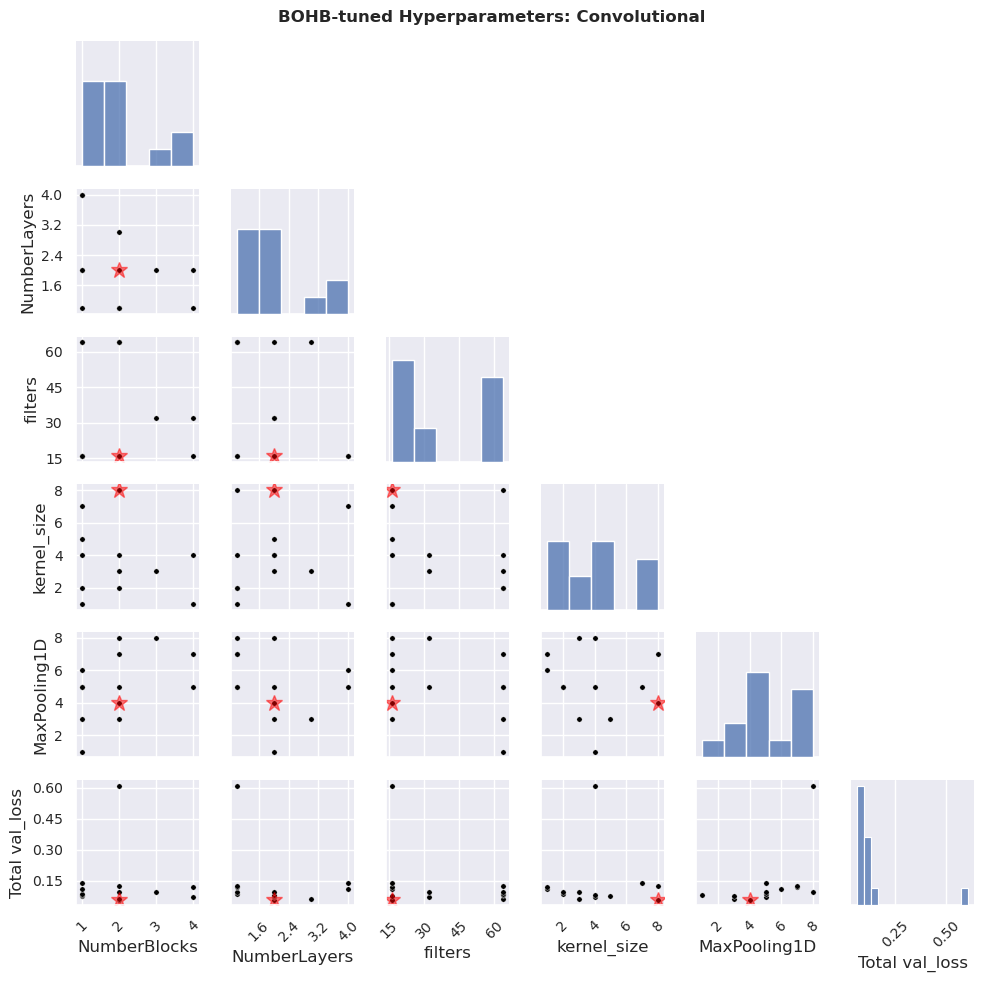

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, LogLocator

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
    'Conv__NumberBlocks',
                  'Conv__NumberLayers',
                  'Conv__filters',
                  'Conv__kernel_size',
                  'Conv__MaxPooling1D',
                  'val_loss']]

# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
labels = [
          'NumberBlocks',
          'NumberLayers',
          'filters',
          'kernel_size',
          'MaxPooling1D',
          'Total val_loss']

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=12)
    g.axes[i, 0].set_ylabel(label, fontsize=12)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in [ 'NumberBlocks']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))
        # elif i == 0 and j==5:
        #     # Set logarithmic scale for the diagonal subplots
        #     g.axes[i, j].xaxis.set_major_locator(LogLocator(base=10))
        #     g.axes[i, j].xaxis.set_minor_locator(LogLocator(base=10, subs=[0.02,0.05,0.01, 0.5, 1.], numticks=10))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=12, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Convolutional", fontweight='bold', fontsize=12)

# Set the size of the figure to 10 inches by 10 inches
g.fig.set_size_inches(10, 10)

# plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
from matplotlib.patches import Rectangle

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
                # 'FC_in_Conv__units',
                # 'FC_in_Conv__dropout',
                ###
                'FC__NumberLayers',
                'FC__units', 
                'FC__dropout', 
                ###
                'FC__units_c_o_ratio',
                'FC__units_gravity', 
                'FC__units_metallicity', 
                'FC__units_temperature',
                'FC_out_dropout',
                # # ###
                'lr',
                # ###
                'val_loss']]

# display(data)
# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
# Customize the x-axis tick labels for each subplot
labels = [
            # # ###
            # 'Units ($FC1$)',
            # 'Dropout ($FC1$)',
            ###
            'NumberLayers ($FC2$)',
            'Units ($FC2$)', 
            'Dropout ($FC2$)', 
            ###
            'Units_C/O ($FC3$)',
            'Units_$\log g$ ($FC3$)', 
            'Units_[M/H] ($FC3$)', 
            'Units_T$_{eff}$ ($FC3$)',
            'Dropout ($FC3$)',
            # # ###
            'lr',
            # ###
            'Total val_loss'
        ]

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=16)
    g.axes[i, 0].set_ylabel(label, fontsize=16)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in ['FC__units', 'FC__units_c_o_ratio']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator([4,8,16,32,64,128,256]))
                # g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=14, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Fully-Connected", fontweight='bold', fontsize=26)

# Set the size of the figure to 10 inches by 10 inches
# g.fig.set_size_inches(14, 14)
plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


KeyError: "['FC__dropout', 'FC__units_c_o_ratio', 'FC__units_gravity', 'FC__units_metallicity', 'FC__units_temperature', 'FC_out_dropout'] not in index"